In [1]:
import numpy as np
import torch
import torch.nn as nn
from torch_geometric.loader import DataLoader

from exploration.dataset import PyGAcademicGraph

from utils import set_all_seeds, train, evaluate, plot_MSE_scores

from exploitation.models import LinearRegression

NUM_EXPERIMENTS = 5
set_all_seeds(seed=4)

In [2]:
batch_size = 1

# train dataset
train_dataset = PyGAcademicGraph(split="train", setting="inductive")
train_dataloader = DataLoader(train_dataset, batch_size=batch_size)

# val dataset
val_dataset = PyGAcademicGraph(split="val", setting="inductive")
val_dataloader = DataLoader(val_dataset, batch_size=batch_size)

# test dataset
test_dataset = PyGAcademicGraph(split="test", setting="inductive")
test_dataloader = DataLoader(test_dataset, batch_size=batch_size)

# number of features
n_features = train_dataset[0].x.shape[1]

print("Number of samples in the train dataset: ", len(train_dataset))
print("Number of samples in the val dataset: ", len(test_dataset))
print("Number of samples in the test dataset: ", len(test_dataset))
print("Output of one sample from the train dataset: ", train_dataset[0])
print("Edge_index :")
print(train_dataset[0].edge_index)
print("Number of features per node: ", n_features)

Number of samples in the train dataset:  9
Number of samples in the val dataset:  9
Number of samples in the test dataset:  9
Output of one sample from the train dataset:  Data(edge_index=[2, 36936], y=[359], x=[359, 8], edge_attr=[36936, 3], domain='Academia', train_mask=[359], val_mask=[359], test_mask=[359], mask=[359])
Edge_index :
tensor([[  0,   0,   0,  ..., 357, 358, 358],
        [  1,  89, 121,  ..., 352,  89, 358]])
Number of features per node:  8


In [3]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("\nDevice: ", device)

model_name = "Linear regression"

num_epochs = 500
all_best_models = []
all_epoch_lists = []
all_MSEs = []
for _ in range(NUM_EXPERIMENTS):
    linear_regression = LinearRegression(
        input_size=n_features,
        output_size=1).to(device)

    loss_fcn = nn.MSELoss()
    optimizer = torch.optim.Adam(linear_regression.parameters(), lr=0.005)
    epoch_list, MSEs, best_model = train(linear_regression, loss_fcn, device, optimizer, num_epochs, train_dataloader, val_dataloader)
    all_best_models.append(best_model)
    all_epoch_lists.append(epoch_list)
    all_MSEs.append(MSEs)


Device:  cpu
Epoch 00001 | Loss: 0.1529
MSE: 0.1453
Epoch 00002 | Loss: 0.1455
Epoch 00003 | Loss: 0.1392
Epoch 00004 | Loss: 0.1359
Epoch 00005 | Loss: 0.1330
Epoch 00006 | Loss: 0.1330
MSE: 0.1676
Epoch 00007 | Loss: 0.1332
Epoch 00008 | Loss: 0.1325
Epoch 00009 | Loss: 0.1320
Epoch 00010 | Loss: 0.1313
Epoch 00011 | Loss: 0.1309
MSE: 0.1636
Epoch 00012 | Loss: 0.1303
Epoch 00013 | Loss: 0.1294
Epoch 00014 | Loss: 0.1281
Epoch 00015 | Loss: 0.1262
Epoch 00016 | Loss: 0.1227
MSE: 0.1579
Epoch 00017 | Loss: 0.1127
Epoch 00018 | Loss: 0.0807
Epoch 00019 | Loss: 0.0445
Epoch 00020 | Loss: 0.0364
Epoch 00021 | Loss: 0.0388
MSE: 0.0672
Epoch 00022 | Loss: 0.0200
Epoch 00023 | Loss: 0.0265
Epoch 00024 | Loss: 0.0343
Epoch 00025 | Loss: 0.0228
Epoch 00026 | Loss: 0.0237
MSE: 0.0426
Epoch 00027 | Loss: 0.0151
Epoch 00028 | Loss: 0.0142
Epoch 00029 | Loss: 0.0150
Epoch 00030 | Loss: 0.0165
Epoch 00031 | Loss: 0.0134
MSE: 0.0364
Epoch 00032 | Loss: 0.0146
Epoch 00033 | Loss: 0.0148
Epoch 00034

MSE of Linear regression-0 on the test set: 0.0253
MSE of Linear regression-1 on the test set: 0.0245
MSE of Linear regression-2 on the test set: 0.0186
MSE of Linear regression-3 on the test set: 0.0243
MSE of Linear regression-4 on the test set: 0.0241
OVERALL: MSE of Linear regression on the test set: 0.0243


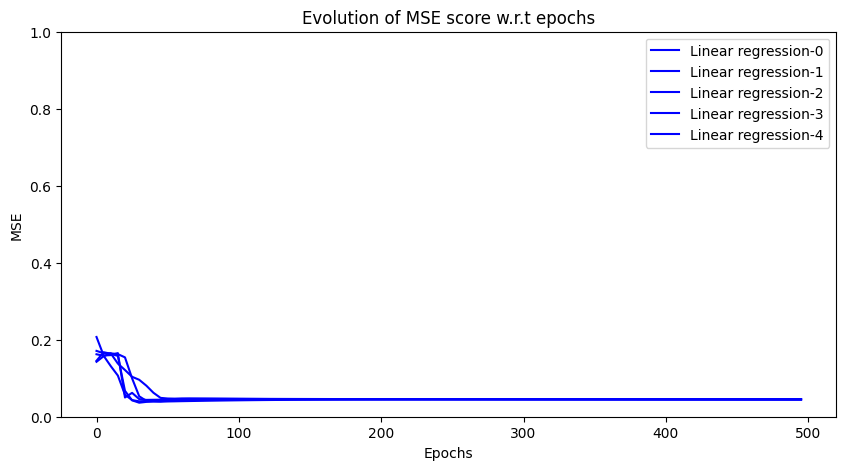

In [4]:
all_MSE_tests = []
for i in range(NUM_EXPERIMENTS):
    MSE_test = evaluate(all_best_models[i], loss_fcn, device, test_dataloader)
    print(f"MSE of {model_name}-{i} on the test set: {MSE_test:.4f}")
    all_MSE_tests.append(MSE_test)
print(f"OVERALL: MSE of {model_name} on the test set: {np.median(np.array(all_MSE_tests)):.4f}")

plot_MSE_scores(all_epoch_lists, all_MSEs, model_name=model_name)